# Diabetes Prediction based on Health Indicators
*CSE 4214 - Pattern Recognition Lab - Project*

*Dept. of Computer Science & Engineering, AUST*

*Spring-2021*

**Team Members**

Abrar Rafid Noor - 170204059

Md. Sakib Irtiza - 170204081

Labib Abdullah - 170204114

In [2]:
# importing necessary libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# loading the dataset
df = pd.read_csv('/content/drive/MyDrive/PR_project_dataset/diabetes_012_health_indicators_BRFSS2015.csv')
df.head(5)

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

# Brief Decription of the Columns of the Dataset 

**Diabetes_012**: 0 = no diabetes, 1 = prediabetes, 2 = diabetes

**HighBP**: 0 = no high, BP 1 = high BP

**HighChol**: 0 = no high cholesterol, 1 = high cholesterol

**CholCheck**: 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years

**BMI**: Body Mass Index

**Smoker**: Have smoked at least 100 cigarettes in their entire life? 0 = no, 1 = yes

**Stroke**: Had a stroke. 0 = no, 1 = yes

**HeartDiseaseorAttack**: Coronary Heart Disease (CHD) or Myocardial Infarction (MI). 0 = no, 1 = yes

**PhysActivity**: Physical activity in past 30 days - not including job. 0 = no, 1 = yes

**Fruits**: Consumes Fruit 1 or more times per day. 0 = no, 1 = yes

**Veggies**: Consumes Vegetables 1 or more times per. day 0 = no, 1 = yes

**HvyAlcoholConsump**: If heavy drinkers. 0 = no, 1 = yes

**AnyHealthcare**: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no, 1 = yes

**NoDocbcCost**: Was there a time in the past 12 months when they needed to see a doctor but could not because of cost? 0 = no, 1 = yes

**GenHlth**: In general their health is: (scale 1-5) 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor

**MentHlth**: Mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was their mental health not good?

**PhysHlth**: Physical health, which includes physical illness and injury, for how many days during the past 30 days was their physical health not good?

**DiffWalk**: Do they have serious difficulty walking or climbing stairs? 0 = no, 1 = yes

**Sex**: 0 = female, 1 = male

**Age**: 13-level age category 1 = 18-24..., 9 = 60-64..., 13 = 80 or older.

**Education**: Education level (scale 1-6) 1 = Never attended school or only kindergarten, 2 = Grades 1 through 8...

**Income**: Income(USD) scale (scale 1-8) 1 = less than 10,000... 5 = less than 35,000 ...8 = 75,000 or more

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

All features and target are in floating datatype, with no missing values.

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64

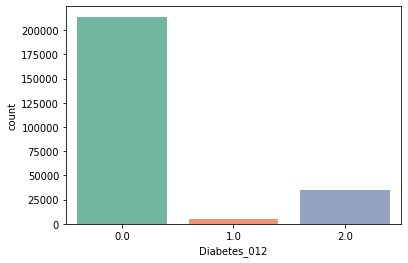

In [ ]:
ax = sns.countplot(x='Diabetes_012', data=df, palette="Set2")
df['Diabetes_012'].value_counts()

Our target feature *Diabetes_012* contains three unique values: 0, 1 and 2.

* **0** stands for **no diabetes** has **187248** cases
* **1** stands for **prediabetes** has **4071** cases
* **2** stands for **diabetes** has **30948** cases

In [6]:
X = df.drop('Diabetes_012', axis=1)
y = df.Diabetes_012

Binning the *BMI* feature

0:'UnderWeight', 1:'Healthy', 2:'Overweight', 3:'Obese', 4:'Obese+'

In [7]:
bins = [ 0, 18.5, 24.9, 29.9, 30.0, 100 ]
labels = [ 0.0, 1.0, 2.0, 3.0, 4.0 ]
X['BMI_BINNED'] = pd.cut(X['BMI'], bins=bins, labels=labels)
X['BMI_BINNED'] = X['BMI_BINNED'].astype('float64')
X = X.drop('BMI', axis=1)
X

HighBP  HighChol  CholCheck  Smoker  Stroke  HeartDiseaseorAttack  \
0          1.0       1.0        1.0     1.0     0.0                   0.0   
1          0.0       0.0        0.0     1.0     0.0                   0.0   
2          1.0       1.0        1.0     0.0     0.0                   0.0   
3          1.0       0.0        1.0     0.0     0.0                   0.0   
4          1.0       1.0        1.0     0.0     0.0                   0.0   
...        ...       ...        ...     ...     ...                   ...   
253675     1.0       1.0        1.0     0.0     0.0                   0.0   
253676     1.0       1.0        1.0     0.0     0.0                   0.0   
253677     0.0       0.0        1.0     0.0     0.0                   0.0   
253678     1.0       0.0        1.0     0.0     0.0                   0.0   
253679     1.0       1.0        1.0     0.0     0.0                   1.0   

        PhysActivity  Fruits  Veggies  HvyAlcoholConsump  ...  NoDocbcCost  \
0                0.0     0.0      1.0                0.0  ...          0.0   
1                1.0     0.0      0.0                0.0  ...          1.0   
2                0.0     1.0      0.0                0.0  ...          1.0   
3                1.0     1.0      1.0                0.0  ...          0.0   
4                1.0     1.0      1.0                0.0  ...          0.0   
...              ...     ...      ...                ...  ...          ...   
253675           0.0     1.0      1.0                0.0  ...          0.0   
253676           0.0     0.0      0.0                0.0  ...          0.0   
253677           1.0     1.0      0.0                0.0  ...          0.0   
253678           0.0     1.0      1.0                0.0  ...          0.0   
253679           1.0     1.0      0.0                0.0  ...          0.0   

        GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income  \
0           5.0      18.0      15.0       1.0  0.0   9.0        4.0     3.0   
1           3.0       0.0       0.0       0.0  0.0   7.0        6.0     1.0   
2           5.0      30.0      30.0       1.0  0.0   9.0        4.0     8.0   
3           2.0       0.0       0.0       0.0  0.0  11.0        3.0     6.0   
4           2.0       3.0       0.0       0.0  0.0  11.0        5.0     4.0   
...         ...       ...       ...       ...  ...   ...        ...     ...   
253675      3.0       0.0       5.0       0.0  1.0   5.0        6.0     7.0   
253676      4.0       0.0       0.0       1.0  0.0  11.0        2.0     4.0   
253677      1.0       0.0       0.0       0.0  0.0   2.0        5.0     2.0   
253678      3.0       0.0       0.0       0.0  1.0   7.0        5.0     1.0   
253679      2.0       0.0       0.0       0.0  0.0   9.0        6.0     2.0   

        BMI_BINNED  
0              4.0  
1              2.0  
2              2.0  
3              2.0  
4              1.0  
...            ...  
253675         4.0  
253676         0.0  
253677         2.0  
253678         1.0  
253679         2.0  

[253680 rows x 21 columns]

In [ ]:
(y.value_counts()/y.value_counts().sum())*100

0.0    84.241170
2.0    13.933302
1.0     1.825528
Name: Diabetes_012, dtype: float64

No Diabetes is **84.24%**

Pre Diabetes is **1.82%**

Diabetes is **13.93%**

which clearly shows that the dataset is *imbalanced*.

## Test: 0 
Dataset: **Original Dataset**

Model for Evaluation: **Decision Tree**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5981114)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5981114)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = classifier.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print("Accuracy: "+"{:.2f}".format(accuracy_score(y_val, y_pred)))
print(classification_report(y_val, y_pred))

[[16727   352  2131]
 [  293    19    95]
 [ 2133   118   964]]
Accuracy: 0.78
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87     19210
         1.0       0.04      0.05      0.04       407
         2.0       0.30      0.30      0.30      3215

    accuracy                           0.78     22832
   macro avg       0.40      0.41      0.41     22832
weighted avg       0.78      0.78      0.78     22832



Conclusion: The accuracy showing is 78% as the model is performing good for predicting *no diabetes*, performance on predicting the other classes are quite poor. 

# Implementing Under Sampling

## Test: 1

Dataset: **Random Sampling Implemented**

Model for Evaluation: **Decision Tree**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X, y)

#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.1, random_state=5981114)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5981114)

#from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = classifier.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print("Accuracy: "+"{:.2f}".format(accuracy_score(y_val, y_pred)))
print(classification_report(y_val, y_pred))

[[201 105  92]
 [113 141 152]
 [ 99 163 185]]
Accuracy: 0.42
              precision    recall  f1-score   support

         0.0       0.49      0.51      0.50       398
         1.0       0.34      0.35      0.35       406
         2.0       0.43      0.41      0.42       447

    accuracy                           0.42      1251
   macro avg       0.42      0.42      0.42      1251
weighted avg       0.42      0.42      0.42      1251



Conclusion: Model performance is *Unsatisfactory*

## Test: 2
Dataset: **Near-Miss 3 Implemented**

Model Used for Evaluation: **Decision Tree**

In [ ]:
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss

# defining the undersampling method
undersample = NearMiss(version=3)
X_res, y_res = undersample.fit_resample(X, y)

#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.1, random_state=5981114)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5981114)

#from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = classifier.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print("Accuracy: "+"{:.2f}".format(accuracy_score(y_val, y_pred)))
print(classification_report(y_val, y_pred))

[[146 107 145]
 [ 85 233  88]
 [182  86 179]]
Accuracy: 0.45
              precision    recall  f1-score   support

         0.0       0.35      0.37      0.36       398
         1.0       0.55      0.57      0.56       406
         2.0       0.43      0.40      0.42       447

    accuracy                           0.45      1251
   macro avg       0.44      0.45      0.45      1251
weighted avg       0.45      0.45      0.45      1251



## Test: 3
Dataset: **Near-Miss 1 Implemented**

Model Used for Evaluation: **Decision Tree**

In [12]:
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss

# defining the undersampling method
undersample = NearMiss(version=1)
# transform the dataset
X_res, y_res = undersample.fit_resample(X, y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.1, random_state=5981114)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5981114)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = classifier.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print("Accuracy: "+"{:.2f}".format(accuracy_score(y_val, y_pred)))
print(classification_report(y_val, y_pred))

[[361  19  18]
 [ 49 293  64]
 [ 98  66 283]]
Accuracy: 0.75
              precision    recall  f1-score   support

         0.0       0.71      0.91      0.80       398
         1.0       0.78      0.72      0.75       406
         2.0       0.78      0.63      0.70       447

    accuracy                           0.75      1251
   macro avg       0.75      0.75      0.75      1251
weighted avg       0.75      0.75      0.75      1251



Conclusion: Undersampling technique **Near Miss-1** performed quite **better** than **Random Sampling** and **Near Miss-3**. So we will further proceed with this undersampled dataset.

In [13]:
df_res = pd.concat([X_res, y_res], axis=1, join='inner')

0.0    4631
1.0    4631
2.0    4631
Name: Diabetes_012, dtype: int64

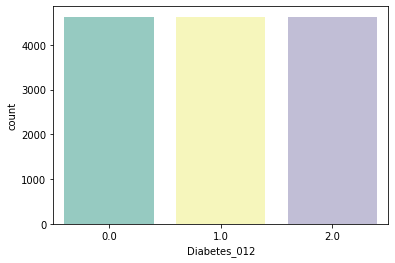

In [ ]:
ax = sns.countplot(x='Diabetes_012', data=df_res, palette="Set3")
df_res['Diabetes_012'].value_counts()

In [ ]:
# creating the new csv file with this resized dataframe
df_res.to_csv('under_sampled_diabetes_dataset.csv')
!cp under_sampled_diabetes_dataset.csv "drive/My Drive/PR_project_dataset"

In [ ]:
df_res = pd.read_csv('/content/drive/MyDrive/PR_project_dataset/under_sampled_diabetes_dataset.csv')
df_res = df_res.iloc[:, 1:]
X_res = df_res.iloc[:, :-1]
y_res = df_res.iloc[:, -1]

# Feature Selection

## Method:1 Distribution of Data of the Features

In [ ]:
healthy_life_style = ['PhysActivity', 'Fruits', 'Veggies','HvyAlcoholConsump','DiffWalk','Smoker']
vunerable_health_state = ['HighBP','HighChol','Stroke','HeartDiseaseorAttack']
general_life_state = ['Sex','Age','Education','Income']
health_state = ['CholCheck','AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','PhysHlth','BMI_BINNED']

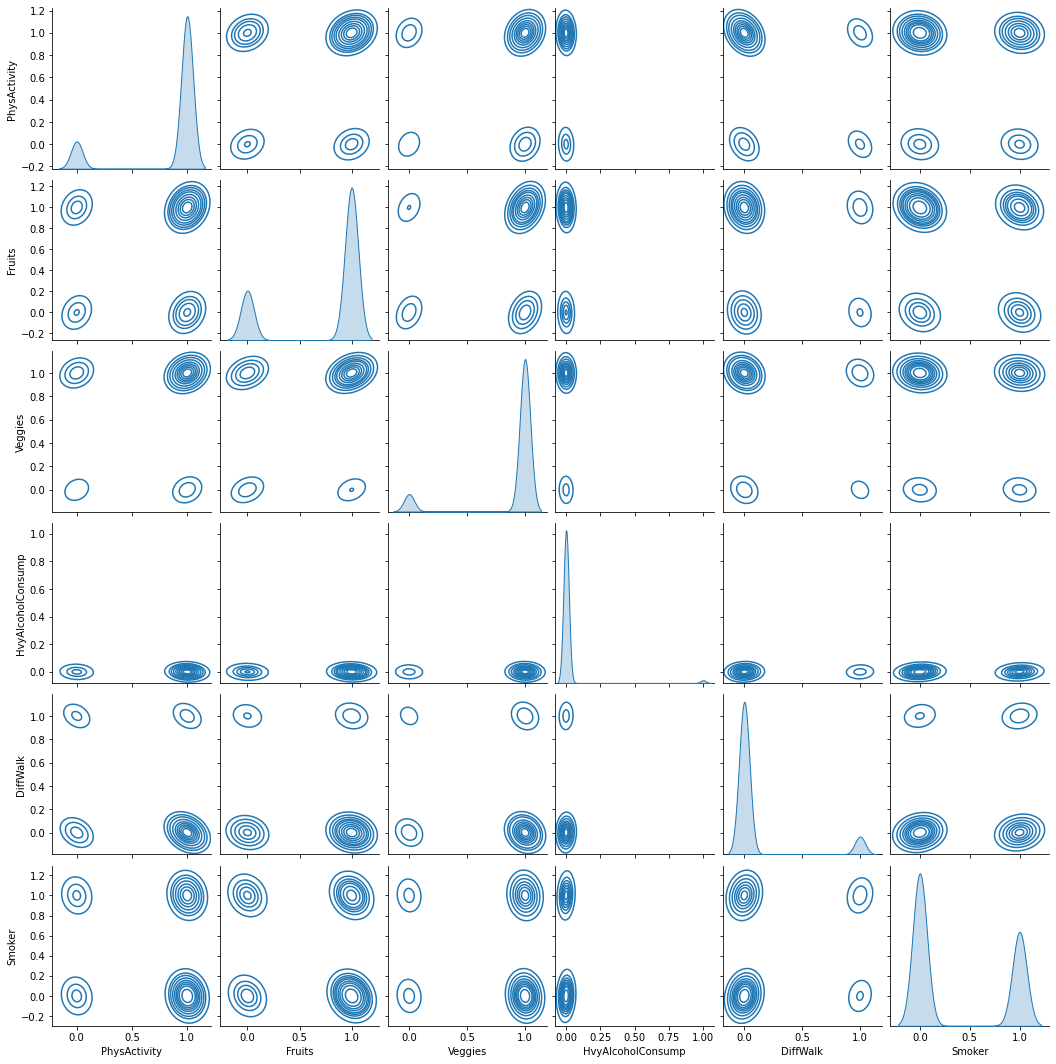

In [ ]:
sns.pairplot(df_res.loc[:, healthy_life_style], kind='kde', palette='Reds')

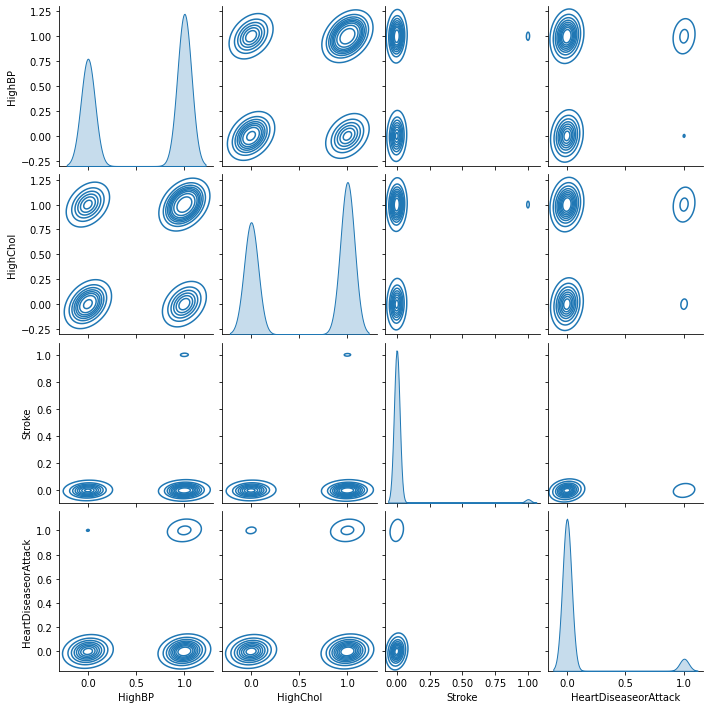

In [ ]:
sns.pairplot(df_res.loc[:, vunerable_health_state], kind='kde', palette='Reds')

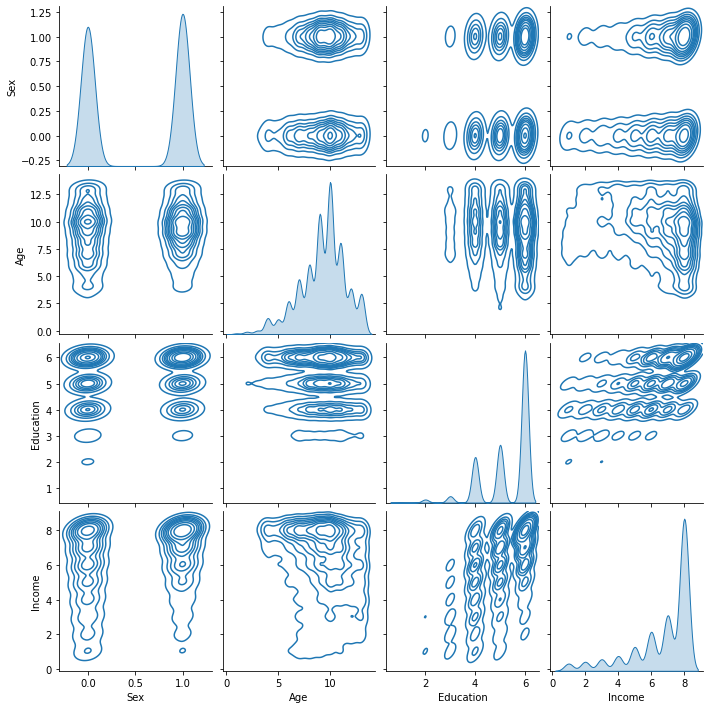

In [ ]:
sns.pairplot(df_res.loc[:, general_life_state], kind='kde', palette='Reds')

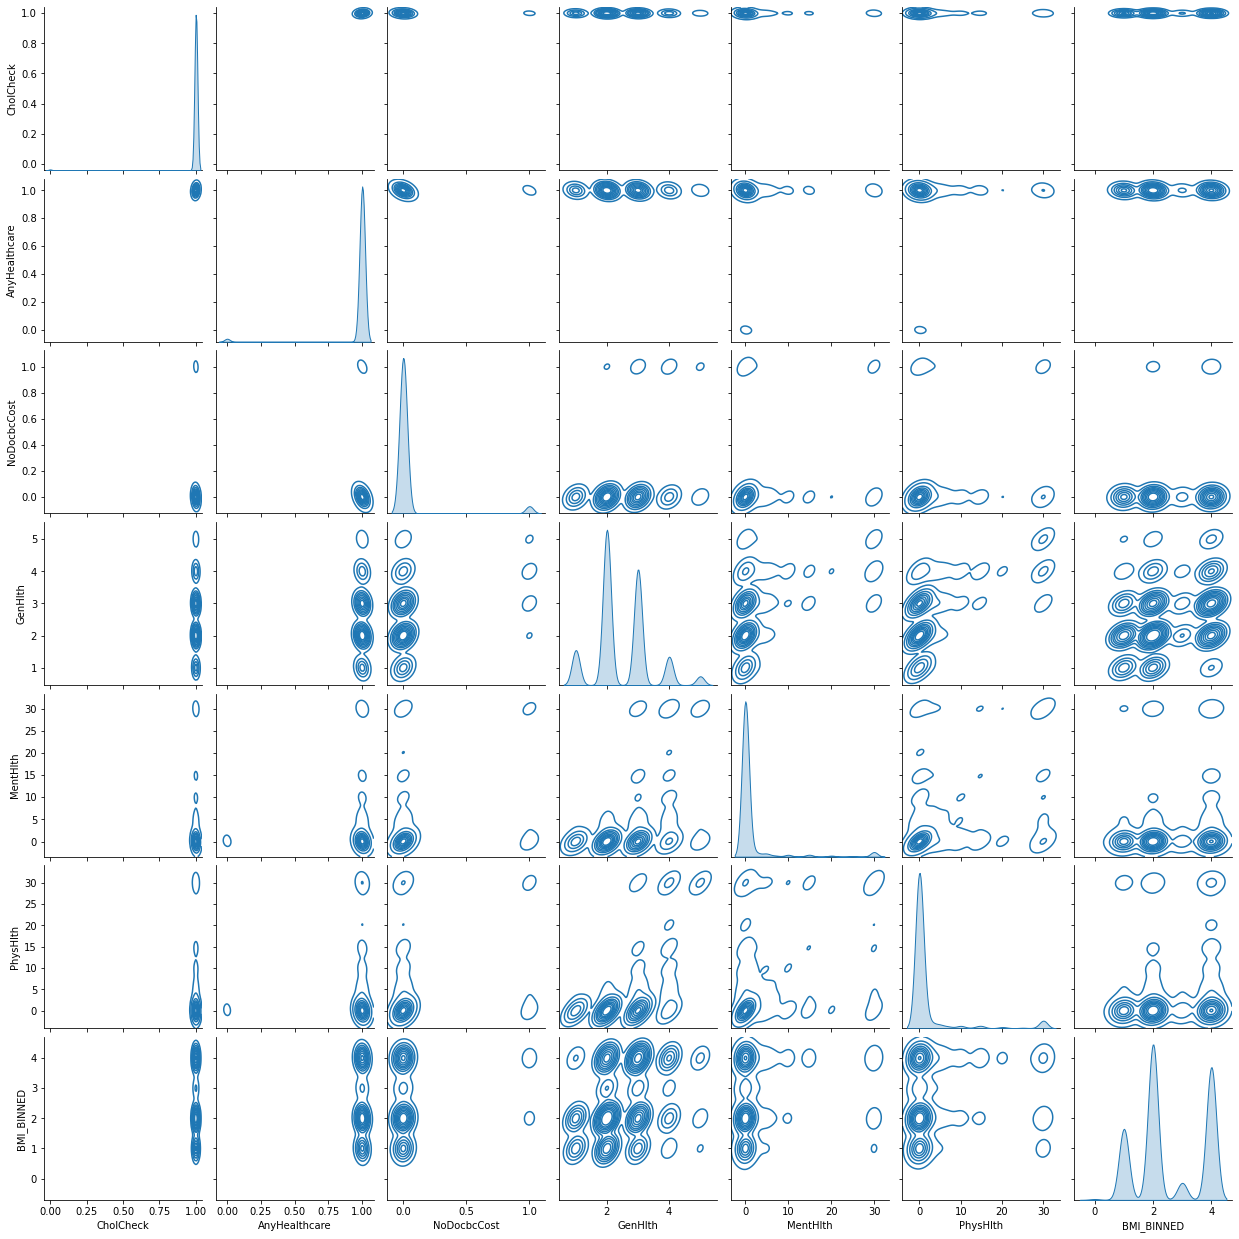

In [ ]:
sns.pairplot(df_res.loc[:, health_state], kind='kde', palette='Reds')

From the above plotting, we can see
* *Veggies*
* *HvyAlcoholConsump*
* *DiffWalk*
* *Stroke*
* *HeartDiseaseorAttack*
* *CholCheck*
* *AnyHealthcare*
* *NoDocbcCost*
* *MentHlth*
* *PhysHlth* 


these features' data distribution are very poor. 

**Ploting for understanding dataset**

In [14]:
px.histogram(df_res, x='Age', y='Diabetes_012', color='Income', facet_row='HighBP'
            , facet_col='HighChol', barmode='relative', text_auto='.2s')

In [15]:
px.histogram(df_res, x='Age', y='Diabetes_012', color='PhysActivity', facet_row='HighBP'
            , facet_col='HighChol', barmode='group', text_auto='.2s')

In [16]:
px.histogram(df_res, x='Age', y='Diabetes_012', color='DiffWalk', facet_row='HighBP'
            , facet_col='HighChol', barmode='group', text_auto='.2s')

In [17]:
px.histogram(df_res, x='Age', y='Diabetes_012', color='AnyHealthcare', facet_row='HighBP'
            , facet_col='HighChol', barmode='group', text_auto='.2s')

In [18]:
px.histogram(df_res, x='Age', y='Diabetes_012', color='CholCheck', facet_row='HighBP'
            , facet_col='HighChol', barmode='relative', text_auto='.2s')

In [19]:
px.histogram(df_res, x='Age', y='Diabetes_012', color='GenHlth', facet_row='HighBP'
            , facet_col='HighChol', barmode='relative', text_auto='.2s')

In [21]:
px.histogram(df_res, x='Age', y='Diabetes_012', color='Veggies', facet_row='HighBP'
            , facet_col='HighChol', barmode='group', text_auto='.2s')

In [22]:
px.histogram(df_res, x='Age', y='Diabetes_012', color='Fruits', barmode='group', text_auto='.2s')

In [23]:
px.histogram(df_res, x='Age', y='Diabetes_012', color='Smoker', facet_row='HighBP'
            , facet_col='HighChol', text_auto='.2s')

In [24]:
px.histogram(df_res, x='Age', y='Diabetes_012', color='BMI_BINNED', facet_row='HighBP'
            , facet_col='HighChol', barmode='relative', text_auto='.2s')

In [25]:
px.histogram(df_res, x='Age', y='Diabetes_012', color='NoDocbcCost', facet_row='HighBP'
            , facet_col='HighChol', barmode='relative', text_auto='.2s')

**Pie Charts**

In [26]:
px.pie(df_res, values='Smoker', names='Education', title='Diabetes and Education Level',
          color_discrete_sequence=px.colors.sequential.RdBu
      )

In [27]:
px.pie(df_res, values='Diabetes_012', names='Income', title='Diabetes and Income Level',
          color_discrete_sequence=px.colors.sequential.RdBu
      )

In [28]:
px.pie(df_res, values='Diabetes_012', names='Smoker', title='Diabetes and Smoking',
          color_discrete_sequence=px.colors.sequential.RdBu
      )

In [29]:
px.pie(df_res, values='Diabetes_012', names='DiffWalk', title='Diabetes and Difficulty Walking',
          color_discrete_sequence=px.colors.sequential.Sunset
      )

In [30]:
px.pie(df_res, values='Diabetes_012', names='Veggies', title='Diabetes and Difficulty Walking',
          color_discrete_sequence=px.colors.sequential.Teal
      )

In [31]:
px.pie(df_res, values='Diabetes_012', names='BMI_BINNED', title='Diabetes and BMI',
          color_discrete_sequence=px.colors.sequential.Agsunset
      )

## Test: 4
Dataset: **Excluding the poor distributed features**

Model Used for Evaluation: **Decision Tree**

In [ ]:
X_train = X_res.drop(columns=['Veggies','HvyAlcoholConsump','DiffWalk','Stroke','HeartDiseaseorAttack','CholCheck','AnyHealthcare','NoDocbcCost','MentHlth','PhysHlth'], inplace=False)

#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_res, test_size=0.1, random_state=5981114)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5981114)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = classifier.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print("Accuracy: {:.2f}".format(accuracy_score(y_val, y_pred)))
print(classification_report(y_val, y_pred))

[[359  23  16]
 [ 56 238 112]
 [ 91 115 241]]
Accuracy: 0.67
              precision    recall  f1-score   support

         0.0       0.71      0.90      0.79       398
         1.0       0.63      0.59      0.61       406
         2.0       0.65      0.54      0.59       447

    accuracy                           0.67      1251
   macro avg       0.67      0.68      0.66      1251
weighted avg       0.66      0.67      0.66      1251



## Method:2 Correlation Among the Features and with Target Feature

Text(0.5, 1.0, 'Triangle Correlation Heatmap of the dataset')

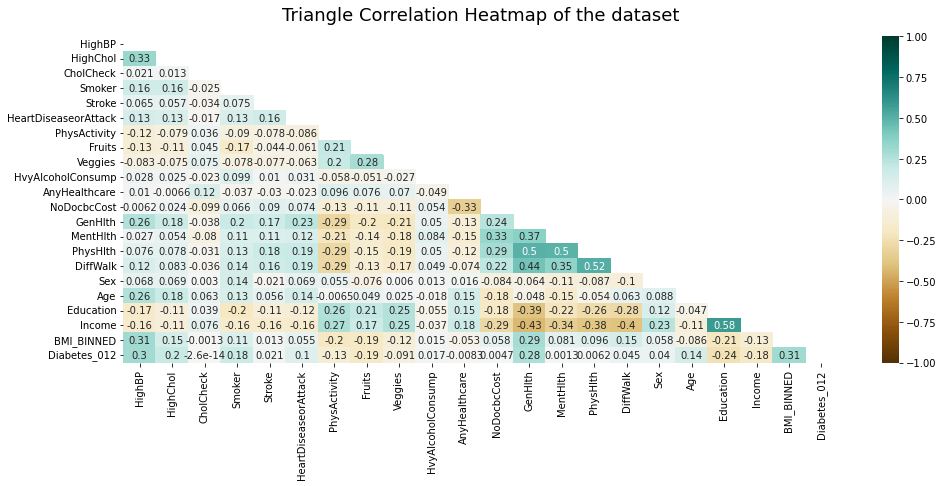

In [ ]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_res.corr(), dtype=bool))
heatmap = sns.heatmap(df_res.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap of the dataset', fontdict={'fontsize':18}, pad=16)

After plotting the triangle correlation heatmap, we can clearly see **strong correlation( > 0.8 ) among the features do not exists**. So, we do not need to drop any columns yet. 


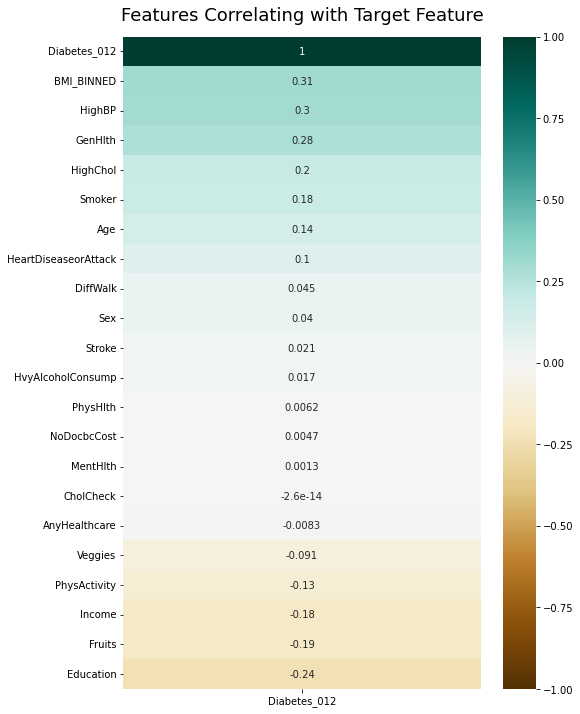

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_res.corr()[['Diabetes_012']].sort_values(by='Diabetes_012', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Target Feature', fontdict={'fontsize':18}, pad=16);

From the above correlation heat maps 
* *DiffWalk*
* *Sex*
* *Stroke*
* *HvyAlcoholConsump*
* *PhysHlth*
* *NoDocbcCost*
* *MentHlth*
* *CholCheck*
* *AnyHealthcare*

these features are showing similar to *neutral correlation* with the target feature.

##Test: 5
Dataset: **Excluding the poor correlated features**

Model Used for Evaluation: **Decision Tree**

In [ ]:
X_train = X_res.drop(columns=['DiffWalk','Sex','Stroke','HvyAlcoholConsump','PhysHlth','NoDocbcCost','MentHlth','CholCheck','AnyHealthcare'], inplace=False)

#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_res, test_size=0.1, random_state=5981114)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5981114)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = classifier.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print("Accuracy: {:.2f}".format(accuracy_score(y_val, y_pred)))
print(classification_report(y_val, y_pred))

[[358  20  20]
 [ 50 245 111]
 [101 118 228]]
Accuracy: 0.66
              precision    recall  f1-score   support

         0.0       0.70      0.90      0.79       398
         1.0       0.64      0.60      0.62       406
         2.0       0.64      0.51      0.57       447

    accuracy                           0.66      1251
   macro avg       0.66      0.67      0.66      1251
weighted avg       0.66      0.66      0.65      1251



## Method:3 Implementing Chi square

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

best_features = SelectKBest(score_func=chi2)
fit = best_features.fit(X_res, y_res)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_res.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  
featureScores

Feature         Score
0                 HighBP    537.932990
1               HighChol    257.298425
2              CholCheck      0.538144
3                 Smoker    519.375873
4                 Stroke    411.136213
5   HeartDiseaseorAttack    585.875000
6           PhysActivity    270.827633
7                 Fruits    341.249905
8                Veggies    139.355418
9      HvyAlcoholConsump    300.057377
10         AnyHealthcare      9.009687
11           NoDocbcCost   1132.405844
12               GenHlth   1023.718271
13              MentHlth  41546.778711
14              PhysHlth  56689.104409
15              DiffWalk   2007.822558
16                   Sex    105.548174
17                   Age    164.974291
18             Education    496.226725
19                Income   1958.875167
20            BMI_BINNED    865.682705

In [ ]:
#less significant features
#print(featureScores.nsmallest(10,'Score'))  
for i in range(len(featureScores)):
  if featureScores['Score'][i] < 500.0:
    print(featureScores['Feature'][i])

HighChol
CholCheck
Stroke
PhysActivity
Fruits
Veggies
HvyAlcoholConsump
AnyHealthcare
Sex
Age
Education


After implementing chi square 
* *HighChol*
* *CholCheck*
* *Stroke*
* *PhysActivity*
* *Fruits*
* *Veggies*
* *HvyAlcoholConsump*
* *AnyHealthcare*
* *Sex*
* *Age*
* *Education*

these features are said to be less significant.

##Test: 6
Dataset: **Excluding the poor features identified from Chi Square**

Model Used for Evaluation: **Decision Tree**

In [ ]:
X_train = X_res.drop(columns=['HighChol','CholCheck','Stroke','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','Sex', 'Age', 'Education'], inplace=False)

#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_res, test_size=0.1, random_state=5981114)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5981114)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = classifier.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print("Accuracy: {:.2f}".format(accuracy_score(y_val, y_pred)))
print(classification_report(y_val, y_pred))

[[324   3  71]
 [ 47 276  83]
 [116  39 292]]
Accuracy: 0.71
              precision    recall  f1-score   support

         0.0       0.67      0.81      0.73       398
         1.0       0.87      0.68      0.76       406
         2.0       0.65      0.65      0.65       447

    accuracy                           0.71      1251
   macro avg       0.73      0.72      0.72      1251
weighted avg       0.73      0.71      0.71      1251



# Implementing Extra Tree Classifier

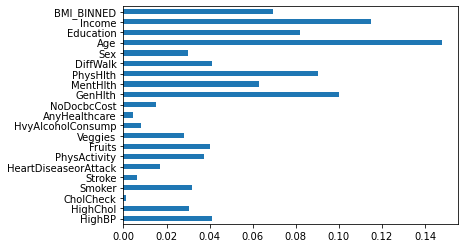

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_res,y_res)

feat_importances = pd.Series(model.feature_importances_, index=X_res.columns)
feat_importances.plot(kind='barh')
plt.show()

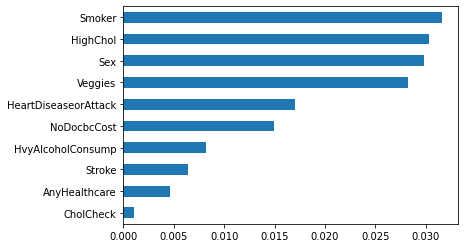

In [ ]:
feat_importances.nsmallest(10).plot(kind='barh')
plt.show()

According to Extra tree classifier
* *CholCheck*
* *AnyHealthcare*
* *Stroke*
* *HvyAlcoholConsump*
* *NoDocbcCost*
* *HeartDiseaseorAttck*
* *Veggies*
* *Sex*
* *HighChol*
* *Smoker*

these are the less significant features.

##Test: 7
Dataset: **Excluding the poor features identified from Extra Tree Classifier**

Model Used for Evaluation: **Decision Tree**

In [ ]:
X_train = X_res.drop(columns=['CholCheck','AnyHealthcare','Stroke','HvyAlcoholConsump', 'NoDocbcCost', 'HeartDiseaseorAttack','Veggies', 'Sex','HighChol','Smoker'], inplace=False)

#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_res, test_size=0.1, random_state=5981114)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5981114)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = classifier.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print("Accuracy: {:.2f}".format(accuracy_score(y_val, y_pred)))
print(classification_report(y_val, y_pred))

[[344  13  41]
 [ 46 288  72]
 [114  73 260]]
Accuracy: 0.71
              precision    recall  f1-score   support

         0.0       0.68      0.86      0.76       398
         1.0       0.77      0.71      0.74       406
         2.0       0.70      0.58      0.63       447

    accuracy                           0.71      1251
   macro avg       0.72      0.72      0.71      1251
weighted avg       0.72      0.71      0.71      1251



After the above analysis, we dicided to apply *voting system* and the following features were selected to be removed
*   **HvyAlcoholConsump**
*   **Stroke**
*   **CholCheck**
*   **AnyHealthcare**


## Test: 8
Dataset: **Dropping Columns after Voting Analysis**

Model Used for Evaluation: **Decision Tree**

In [ ]:
X_train = X_res.drop(columns=['CholCheck','Stroke','HvyAlcoholConsump','AnyHealthcare'], inplace=False)

#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_res, test_size=0.1, random_state=5981114)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5981114)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = classifier.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print("Accuracy: {:.2f}".format(accuracy_score(y_val, y_pred)))
print(classification_report(y_val, y_pred))

[[361  20  17]
 [ 51 283  72]
 [ 98  72 277]]
Accuracy: 0.74
              precision    recall  f1-score   support

         0.0       0.71      0.91      0.80       398
         1.0       0.75      0.70      0.72       406
         2.0       0.76      0.62      0.68       447

    accuracy                           0.74      1251
   macro avg       0.74      0.74      0.73      1251
weighted avg       0.74      0.74      0.73      1251



Conclusion: Lesser important features have been successfully removed.  

In [ ]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

# Feature Extraction: Implementing Principal Component Analysis (PCA)

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA()
pca.fit(X_res)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "Num. of Components", "y": "Explained Variance"}
)

After Component 7, the Explained Variance curve flattened. 

In [34]:
error_rate = []
accuracy_rate = []
for i in range(1, 22):
  pca = PCA(n_components=i)
  pca.fit(X_res)
  x_pca = pca.transform(X_res)
  #from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(x_pca, y_res, test_size=0.1, random_state=5981114)
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5981114)

  from sklearn.tree import DecisionTreeClassifier
  classifier = DecisionTreeClassifier()
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_val)
  error_rate.append(np.mean(y_pred != y_val))
  accuracy_rate.append(accuracy_score(y_val, y_pred))

Text(0, 0.5, 'Error Rate')

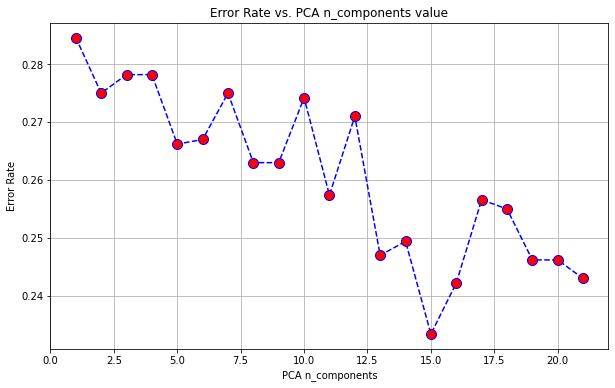

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,22), error_rate, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. PCA n_components value')
plt.xlabel('PCA n_components')
plt.grid(True)
plt.ylabel('Error Rate')

Text(0, 0.5, 'Accuracy')

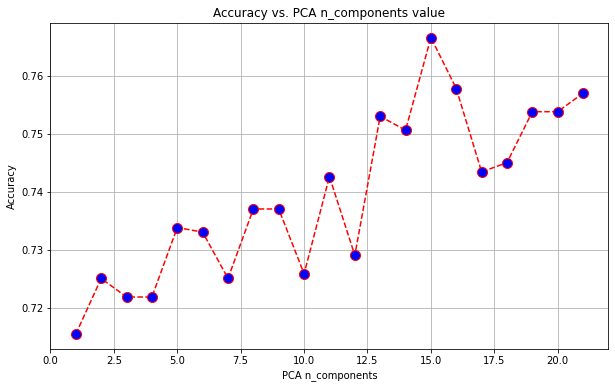

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,22), accuracy_rate,color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Accuracy vs. PCA n_components value')
plt.xlabel('PCA n_components')
plt.grid(True)
plt.ylabel('Accuracy')

Both of the graphs shows that number of principal component equals to 15, gives the highest performance. 

## Test: 9

Dataset: **PCA Applied**

Number of Principal Components: **7**

Model Used for Evaluation: **Decision Tree**

In [ ]:
pca = PCA(n_components=7)
pca.fit(X_res)
x_pca = pca.transform(X_res)
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_pca, y_res, test_size=0.1, random_state=5981114)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5981114)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = classifier.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print("Accuracy: {:.2f}".format(accuracy_score(y_val, y_pred)))
print(classification_report(y_val, y_pred))

[[364  19  15]
 [ 49 272  85]
 [ 91  88 268]]
Accuracy: 0.72
              precision    recall  f1-score   support

         0.0       0.72      0.91      0.81       398
         1.0       0.72      0.67      0.69       406
         2.0       0.73      0.60      0.66       447

    accuracy                           0.72      1251
   macro avg       0.72      0.73      0.72      1251
weighted avg       0.72      0.72      0.72      1251



## Test: 10

Dataset: **PCA Applied**

Number of Principal Components: **15**

Model Used for Evaluation: **Decision Tree**

In [35]:
pca = PCA(n_components=15)
pca.fit(X_res)
x_pca = pca.transform(X_res)
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_pca, y_res, test_size=0.1, random_state=5981114)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5981114)

#from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = classifier.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print("Accuracy: {:.2f}".format(accuracy_score(y_val, y_pred)))
print(classification_report(y_val, y_pred))

[[359  20  19]
 [ 47 293  66]
 [ 92  61 294]]
Accuracy: 0.76
              precision    recall  f1-score   support

         0.0       0.72      0.90      0.80       398
         1.0       0.78      0.72      0.75       406
         2.0       0.78      0.66      0.71       447

    accuracy                           0.76      1251
   macro avg       0.76      0.76      0.75      1251
weighted avg       0.76      0.76      0.75      1251



For No. of Components 7 and 15, the results came better for 15.



After implementing undersampling and then doing feature selection with voting analysis and applying PCA, PCA (num. of components = 15) got the highest accuracy in the validation set. We will train and test our machine learning models with this dataset. 

In [36]:
x_pca = pd.DataFrame(x_pca)
df_pca = pd.concat([x_pca, y_res], axis=1, join='inner')

In [ ]:
# creating the new csv file with this resized dataframe
df_pca.to_csv('under_sampled_feature_selected_extracted_diabetes_dataset.csv')
!cp under_sampled_feature_selected_extracted_diabetes_dataset.csv "drive/My Drive/PR_project_dataset"

##Test: 11
Dataset: **Final Dataset**

Model Used for Evaluation: **Decision Tree**

In [ ]:
classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

[[395  17  16]
 [ 54 337  97]
 [ 92  93 289]]
Accuracy: 0.73
              precision    recall  f1-score   support

         0.0       0.73      0.92      0.82       428
         1.0       0.75      0.69      0.72       488
         2.0       0.72      0.61      0.66       474

    accuracy                           0.73      1390
   macro avg       0.73      0.74      0.73      1390
weighted avg       0.73      0.73      0.73      1390



## Test: 12

Dataset: **Final Dataset**


Model Used for Evaluation: **Random Forest**

In [45]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(x_pca, y_res, test_size=0.2, random_state=5981114)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 300)

classifier.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = classifier.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print("Accuracy: {:.2f}".format(accuracy_score(y_val, y_pred)))
print(classification_report(y_val, y_pred))

[[348  21  29]
 [ 38 293  75]
 [ 56  42 349]]
Accuracy: 0.79
              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83       398
         1.0       0.82      0.72      0.77       406
         2.0       0.77      0.78      0.78       447

    accuracy                           0.79      1251
   macro avg       0.79      0.79      0.79      1251
weighted avg       0.79      0.79      0.79      1251



For num. of estimators accuracy:

50 ---> 0.80

100 --> 0.79

200 --> 0.79

300 --> 0.79

Taking *n_estimators = 50* for test set.

In [46]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)

classifier.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

[[386  15  27]
 [ 49 354  85]
 [ 56  52 366]]
Accuracy: 0.80
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84       428
         1.0       0.84      0.73      0.78       488
         2.0       0.77      0.77      0.77       474

    accuracy                           0.80      1390
   macro avg       0.80      0.80      0.80      1390
weighted avg       0.80      0.80      0.79      1390



## Test: 13

Dataset: **Final Dataset**


Model Used for Evaluation: **Support Vector Machine**

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(x_pca, y_res, test_size=0.2, random_state=5981114)

from sklearn import svm
classifier = svm.SVC(decision_function_shape='ovr')

classifier.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

[[335   1  92]
 [ 36 330 122]
 [ 92  15 367]]
Accuracy: 0.74
              precision    recall  f1-score   support

         0.0       0.72      0.78      0.75       428
         1.0       0.95      0.68      0.79       488
         2.0       0.63      0.77      0.70       474

    accuracy                           0.74      1390
   macro avg       0.77      0.74      0.75      1390
weighted avg       0.77      0.74      0.75      1390



## Test: 14

Dataset: **Final Dataset**


Model Used for Evaluation: **K Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(x_pca, y_res, test_size=0.2, random_state=5981114)

error_rate = []
accuracy_rate = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_val)
  error_rate.append(np.mean(pred_i != y_val))
  #accuracy_rate.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Error Rate')

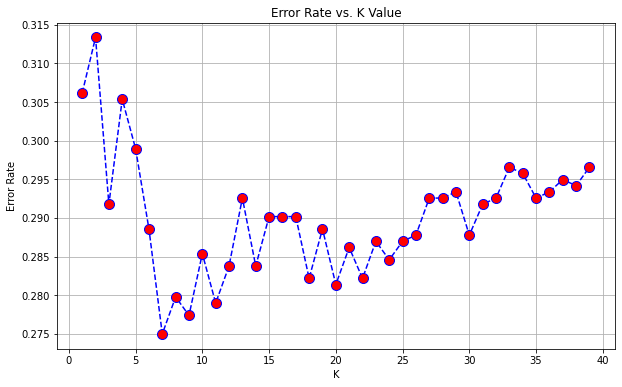

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.grid(True)
plt.ylabel('Error Rate')

*K's optimal value is 7.*

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
pred_i = knn.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

[[335   1  92]
 [ 36 330 122]
 [ 92  15 367]]
Accuracy: 0.74
              precision    recall  f1-score   support

         0.0       0.72      0.78      0.75       428
         1.0       0.95      0.68      0.79       488
         2.0       0.63      0.77      0.70       474

    accuracy                           0.74      1390
   macro avg       0.77      0.74      0.75      1390
weighted avg       0.77      0.74      0.75      1390



##Final Conclusion

After 14 different tests, we came to the conclusion that **Random Forest** performed the best in our final dataset and we gained the highest performance ( *accuracy 80%* ) for our multi-class classification problem of predicting no diabetes, pre diabetes and diabetes based on health indicators. 